# Exploring the Composition of the Dataset
The notebook explores the composition of the dataset to get a better understanding of the number of measurements and identify potential class imbalances.



In [1]:
# Plot graphs inline
%matplotlib inline

## Notebook Setup

In [2]:
import os

# CoLab
if os.getcwd() == '/content':
    from google.colab import drive
    drive.mount('/content/gdrive')
    BASE_PATH = '/content/gdrive/My Drive/Level-4-Project/'
    os.chdir('gdrive/My Drive/Level-4-Project/')

# Laptop 
elif os.getcwd() == 'D:\\Google Drive\\Level-4-Project\\notebooks':
    BASE_PATH = "D:/Google Drive/Level-4-Project/"
 
# GPU cluster   
else:
    BASE_PATH = "/export/home/2192793m/Level-4-Project/"
    
RAW_PATH = BASE_PATH + 'data/raw/'
RESULTS_PATH = BASE_PATH + "results/dataset_composition_analysis/"
if not os.path.exists(RESULTS_PATH):
    os.makedirs(RESULTS_PATH)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
SAVE_GRAPHS = False  # Set to true to allow overriding of graphs

The following cell contains functions to be applied to every row in a particular column of the dataframe.

In [5]:
def find_label(movement):
    """
    Convert movement description to one word label
    :param movement: movement description from experiment notes
    :type movement: str
    :return: one word label
    :rtype: str
    """
    if movement == "Walking":
        return "walking"
    if movement == "Moving arm faster towards radar, slower away":
        return "pushing"
    if movement == "Sitting and standing":
        return "sitting"
    if movement == "Moving arm slower towards radar, faster away":
        return "pulling"
    if movement == "Circling arm forwards":
        return "circling"
    if movement == "Clapping":
        return "clapping"
    if movement == "Bending to pick up and back up":
        return "bending"


def identify_angle(angle):
    """
    Strips " deg" from input
    For example:
    "0 deg" would return "0"
    :param angle: angle in format "0 deg"
    :type angle: str
    :return: angle
    :rtype: str
    """
    return angle.split()[0]


def is_on_place(angle):
    """
    Identifies if measurement has "on place" flag for it's aspect angle
    :param angle: angle in format "0 deg"
    :type angle: str
    :return: if angle measurement is "on place"
    :rtype: bool
    """
    if len(angle.split()) > 2:
        return True
    return False


def assign_user_label(name):
    """
    Takes in subjects name and returns a letter to represent that subject
    :param name: 
    :type name: str
    :return: Letter to represent subject
    :rtype: str 
    """
    if name == "Aleksandar":
        return "A"
    if name == "Francesco":
        return "B"
    if name == "Nadezhda":
        return "C"
    if name == "Leila":
        return "D"
    if name == "Hadi":
        return "E"
    if name == "Ivelina":
        return "F"

Load in the data labels and convert columns to suitable formats

In [6]:
df_labels = pd.read_csv(RAW_PATH + 'Labels.csv')
df_labels.rename(columns={'dataset ID': 'dataset_id'}, inplace=True)
df_labels["label"] = df_labels.movement.apply(find_label)
df_labels["user_label"] = df_labels.person.apply(assign_user_label)
df_labels["aspect_angle"] = df_labels.angle.apply(identify_angle)
df_labels["on_place"] = df_labels.angle.apply(is_on_place)

## The Dataset

In [7]:
df_labels[['dataset_id', 'label', 'user_label', 'aspect_angle']]

,dataset_id,label,user_label,aspect_angle
0,1,walking,A,0
1,2,walking,A,0
2,3,walking,A,30
3,4,walking,A,30
4,5,walking,A,60
5,6,walking,A,60
6,7,pushing,A,0
7,8,pushing,A,0
8,9,pushing,A,30
9,10,pushing,A,30


## Measurements per Subject
Includes measurements from different aspect angles

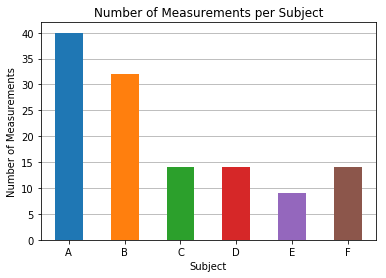

In [8]:
df_labels.groupby(['user_label'])['dataset_id'].count().plot(kind='bar', zorder=3)
plt.title("Number of Measurements per Subject")
plt.xlabel("Subject")
plt.ylabel("Number of Measurements")
plt.grid(axis='y', zorder=0)
plt.xticks(rotation=0)
if SAVE_GRAPHS:
    plt.savefig(RESULTS_PATH + "measurements_per_subject.pdf", format='pdf')
plt.show()

## Measurements per Action
Includes measurements from different aspect angles

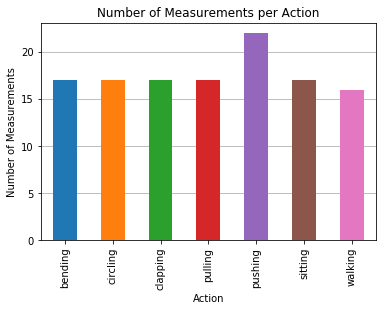

In [9]:
df_labels.groupby(['label'])['dataset_id'].count().plot(kind='bar', zorder=3)
plt.title("Number of Measurements per Action")
plt.xlabel("Action")
plt.ylabel("Number of Measurements")
plt.grid(axis='y', zorder=0)
if SAVE_GRAPHS:
    plt.savefig(RESULTS_PATH + "measurements_per_action.pdf", format='pdf')
plt.show()

## Measurements per Aspect Angle (Degrees)

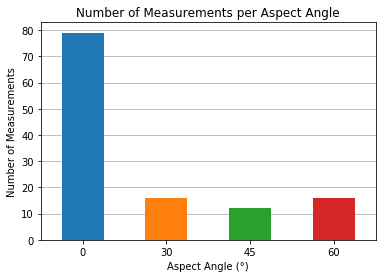

In [10]:
df_labels.groupby(['aspect_angle'])['dataset_id'].count().plot(kind='bar', zorder=3)
plt.title("Number of Measurements per Aspect Angle")
plt.xlabel("Aspect Angle (°)")
plt.ylabel("Number of Measurements")
plt.grid(axis='y', zorder=0)
plt.xticks(rotation=0)
if SAVE_GRAPHS:
    plt.savefig(RESULTS_PATH + "measurements_per_aspect_angle.pdf", format='pdf')
plt.show()

## Measurements per Subject and Aspect Angle
It appears that users C, D, E and F only have data for zero degrees

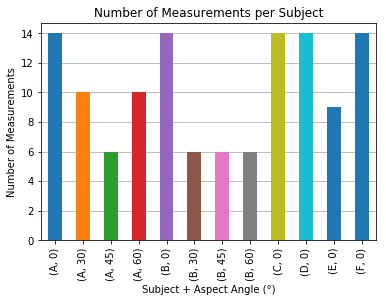

In [11]:
df_labels.groupby(['user_label', 'aspect_angle'])['dataset_id'].count().plot(kind='bar', zorder=3)
plt.title("Number of Measurements per Subject")
plt.xlabel("Subject + Aspect Angle (°)")
plt.ylabel("Number of Measurements")
plt.grid(axis='y', zorder=0)
if SAVE_GRAPHS:
    plt.savefig(RESULTS_PATH + "measurements_per_subject_and_aspect_angle.pdf", format='pdf')
plt.show()

## Subject Comparison for 0° Aspect Angle

In [12]:
zero_degrees = df_labels.loc[df_labels["aspect_angle"] == '0']

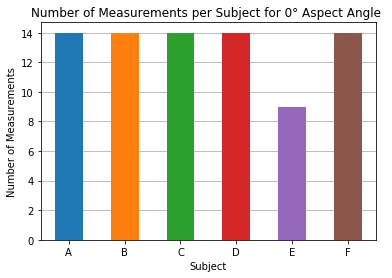

In [13]:
zero_degrees.groupby(['user_label'])['dataset_id'].count().plot(kind='bar', zorder=3)
plt.title("Number of Measurements per Subject for 0° Aspect Angle ")
plt.xlabel("Subject")
plt.ylabel("Number of Measurements")
plt.xticks(rotation=0)
plt.grid(axis='y', zorder=0)
if SAVE_GRAPHS:
    plt.savefig(RESULTS_PATH + "measurements_per_subject_at_0_aspect_angle.pdf", format='pdf')
plt.show()

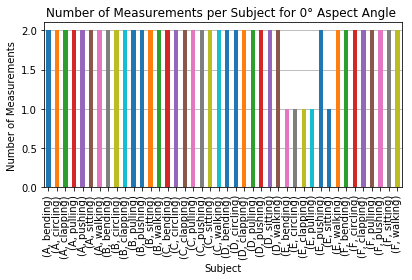

In [14]:
zero_degrees.groupby(['user_label', 'label'])['dataset_id'].count().plot(kind='bar', zorder=3)
plt.title("Number of Measurements per Subject for 0° Aspect Angle ")
plt.xlabel("Subject")
plt.ylabel("Number of Measurements")
plt.xticks(rotation=90)
plt.grid(axis='y', zorder=0)
if SAVE_GRAPHS:
    plt.savefig(RESULTS_PATH + "measurements_per_subject_at_0_aspect_angle.pdf", format='pdf')
plt.tight_layout()
plt.show()

## Analysis of Test Subject C 
Classes are balanced

In [15]:
user_c = df_labels.loc[df_labels["user_label"] == "C", :]

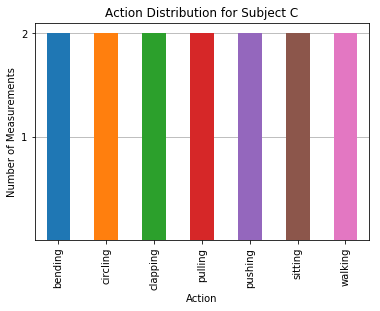

In [16]:
user_c.groupby(['label'])['dataset_id'].count().plot(kind='bar', zorder=3)
plt.title("Action Distribution for Subject C")
plt.xlabel("Action")
plt.ylabel("Number of Measurements")
plt.grid(axis='y', zorder=0)
plt.yticks([1, 2])
if SAVE_GRAPHS:
    plt.savefig(RESULTS_PATH + "subject_c_action_distribution.pdf", format='pdf')
plt.show()